# Урок 2. Метрики качества классификации ч.1

В уроке мы разбирали матрицу ошибок и некоторые метрики, основанные на терминах матрицы ошибок. Здесь же посмотрим, как эти метрики применять на практике и что  по ним можно выяснить.

### 1.1
Выкачайте тренировочный датасет Titanic - train.csv - с сайта [kaggle](https://www.kaggle.com/c/titanic/data). С помощью функции pd.read_csv() загрузите данные в датафрейм. Выведите первые 20 строк и проанализируйте данные: какие колонки присутствуют (более конкретная информация по ним есть на сайте kaggle), каким образом в них обозначены данные и какие типы данных используются (используйте pandas.dtypes). 

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_titanic = pd.read_csv('train.csv')
data_titanic.head(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 1.2
Проверьте, имеются ли пропущенные значения в колонках, и выведите сумму всех пропущенных значений в каждой из колонок.

In [4]:
data_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 1.3
Замените все пропущенные значения колонки Age на медианы в зависимости от пола человека: т.е. если пол человека в строке с пропущенным значением "male", заменяете пропущенное значение возраста на медиану по всем известным возрастам мужчин, и наоборот. Выведите медианы возраста в зависимости от пола. Пропущенные значения колонок Cabin и Embarked замените на U (Unknown).

Примечание: для группировки по полу можно использовать метод df.groupby(), который имеет встроенные агрегатные функции (в т.ч. для вычисления медианы).  Для установки пропущенных значений в датасете воспользуйтесь функцией df.apply().

In [5]:
data_titanic['Cabin'] = data_titanic['Cabin'].fillna('U')
data_titanic['Embarked'] = data_titanic['Embarked'].fillna('U')
med = data_titanic.groupby('Sex')['Age'].transform('median')
data_titanic['Age'] = data_titanic['Age'].fillna(med) # Не получилось сделать функцией apply)
data_titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 1.4
Выведите возраст пассажиров с PassengerID = [6, 20]. Убедитесь, что заполнены все пропущенные значения (воспользуйтесь функцией df.isnull() ).

In [6]:
PassengerID = [6, 20]
data_titanic[data_titanic['PassengerId'] == 6]['Age']
data_titanic[data_titanic['PassengerId'] == 20]['Age']

19    27.0
Name: Age, dtype: float64

Так как не все классификаторы могут работать с категориальными признаками, в данном случае необходимо заменить их на числовые.

Также можно было бы выделить расширенные признаки, такие как статус пассажира (Mr., Mrs., Miss., Dr., Master. и т.д.), собственный индекс билета, индекс палубы и другие, но здесь ограничимся выбором более простых признаков.

### 1.5
В колонке Sex замените значения на 0, если пол "male", и на 1, если "female". В колонке Embarked замените параметры "U", "S", "C", "Q" на 0, 1, 2, 3 соответственно. Отбросьте колонки PassengerId, Name, Ticket, Cabin. Выведите первые 20 строк получившегося набора данных.

In [7]:
data_titanic.loc[(data_titanic['Sex'] == 'male')] = 0
data_titanic.loc[(data_titanic['Sex'] == 'female')] = 1
data_titanic.loc[(data_titanic['Embarked'] == 'U')] = 0
data_titanic.loc[(data_titanic['Embarked'] == 'S')] = 1
data_titanic.loc[(data_titanic['Embarked'] == 'C')] = 2
data_titanic.loc[(data_titanic['Embarked'] == 'Q')] = 3

del data_titanic['PassengerId']
del data_titanic['Name']
del data_titanic['Ticket']
del data_titanic['Cabin']



C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [8]:
data_titanic.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,0,0.0,0,0,0.0,0
1,1,1,1,1.0,1,1,1.0,1
2,1,1,1,1.0,1,1,1.0,1
3,1,1,1,1.0,1,1,1.0,1
4,0,0,0,0.0,0,0,0.0,0
5,0,0,0,0.0,0,0,0.0,0
6,0,0,0,0.0,0,0,0.0,0
7,0,0,0,0.0,0,0,0.0,0
8,1,1,1,1.0,1,1,1.0,1
9,1,1,1,1.0,1,1,1.0,1


### 1.6
Приступим к построению классификаторов. **Условимся, что, если функция или объект модели имеют параметр random_state, то устанавливаем его равным 17 в каждом из случаев.**

Разделите данные на тренировочный и тестовый датасеты, установив размер тестового как 0.25 (первая колонка Survived является целевой, поэтому необходимо сначала ее отделить от признаков).

In [9]:
from sklearn.model_selection import train_test_split 

In [10]:
x = data_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data_titanic['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=17)




### 1.7
Обучите на полученных выборках несколько классификаторов, которые импортированы ниже.

**Примечание: в методе ближайших соседей используйте количество соседей, равное 5.**

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()
dtc = DecisionTreeClassifier()
lr = LogisticRegression()

knn_model = knn.fit(x_train, y_train)
nb_model = nb.fit(x_train, y_train)
dtc_model = dtc.fit(x_train, y_train)
lr_model = lr.fit(x_train, y_train)



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Очевидно, в этом случае использовать метрику accuracy, которую мы применяли до этого, не совсем правильно: она не даст верную оценку классификатору, потому как выживших явно меньше, чем погибших.

Вспомним про такие метрики как точность и полнота. Здесь они подойдут хорошо, так как у нас имеются положительный и отрицательный классы, и определить корректно один из них может оказаться более важным .

### 1.8
В каждом из пунктов следующего теста выберите, что важнее максимизировать: точность (precision) или полноту (recall). Выпишите ответы.

1. Вероятность того, что при определенной поломке самолета он сможет долететь до пункта назначения (1 - долетел, 0 - не долетел).
2. Предсказание, представляет ли человек опасность, по анализу психического состояния (1 - представляет опасность, 0 - не представляет опасности).
3. Предсказание ухода клиента (1 - клиент ушел, 0 - остался).
4. Выявление рака на основе медицинских показателей (1 - болен раком, 0 - здоров).
5. Предсказание летальности при наблюдаемой мутации (1 - выживание, 0 - летальный исход).
6. Определение важности происшествия для экстренных служб (1 - важно, 0 - неважно).
7. Окупятся ли вложения в бизнес (1 - окупятся, 0 - не окупятся).

Ваш ответ:

1. Precision<br>
2. Recall<br>
3. Recall<br>
4. Recall<br>
5. Precision<br>
6. Recall<br>
7. Precision<br>

### 1.9
Определите, что важнее использовать в случае датасета Titanic: полноту или точность. Объясните, почему.

Ответ: нам важно использовать полноту, так как нам нужно знать есть ли среди погибших живые.

### 1.10
Для каждого классификатора выведите матрицу ошибок и самостоятельно рассчитайте метрику recall (расчеты должны присутствовать). Проверьте расчеты, воспользовавшись встроенной метрикой recall_score.

In [13]:
from sklearn.metrics import confusion_matrix, recall_score

In [14]:
knn_model_prediction = knn.predict(x_test)
nb_model_prediction = nb.predict(x_test)
dtc_model_prediction = dtc.predict(x_test)
lr_model_prediction = lr.predict(x_test)



In [15]:
knn_matrix = confusion_matrix(y_test, knn_model_prediction)
nb_matrix = confusion_matrix(y_test, nb_model_prediction)
dtc_matrix = confusion_matrix(y_test, dtc_model_prediction)
lr_matrix = confusion_matrix(y_test, lr_model_prediction)

print(f'Матрица ошибок KNN: {knn_matrix}')
print(f'Матрица ошибок баесовского классификатора: {nb_matrix}')
print(f'Матрица ошибок Decision Tree: {dtc_matrix}')
print(f'Матрица ошибок Logical Regression: {lr_matrix}') # Может что-то сделал не так, но везде метрика полноты будет одинаковая

knn_recall = (knn_matrix[0][0] / (knn_matrix[0][0] + knn_matrix[1][0]))
nb_recall = (nb_matrix[0][0] / (nb_matrix[0][0] + nb_matrix[1][0]))
dtc_recall = (dtc_matrix[0][0] / (dtc_matrix[0][0] + dtc_matrix[1][0]))
lr_recall = (lr_matrix[0][0] / (lr_matrix[0][0] + lr_matrix[1][0]))

print(f'Полнота для KNN: {knn_recall}')
print(f'Полнота для баесовского классификатора: {nb_recall}')
print(f'Полнота для Decision Tree: {dtc_recall}')
print(f'Полнота для Logical Regression: {lr_recall}')

knn_recall = recall_score(y_test, knn_model_prediction)
nb_recall = recall_score(y_test, nb_model_prediction)
dtc_recall = recall_score(y_test, dtc_model_prediction)
lr_recall = recall_score(y_test, lr_model_prediction)

print('Подсчет встроенными методами')
print(f'Полнота для KNN: {knn_recall}')
print(f'Полнота для баесовского классификатора: {nb_recall}')
print(f'Полнота для Decision Tree: {dtc_recall}')
print(f'Полнота для Logical Regression: {lr_recall}')

Матрица ошибок KNN: [[139   0]
 [  0  84]]
Матрица ошибок баесовского классификатора: [[139   0]
 [  0  84]]
Матрица ошибок Decision Tree: [[139   0]
 [  0  84]]
Матрица ошибок Logical Regression: [[139   0]
 [  0  84]]
Полнота для KNN: 1.0
Полнота для баесовского классификатора: 1.0
Полнота для Decision Tree: 1.0
Полнота для Logical Regression: 1.0
Подсчет встроенными методами
Полнота для KNN: 1.0
Полнота для баесовского классификатора: 1.0
Полнота для Decision Tree: 1.0
Полнота для Logical Regression: 1.0


### 1.11
Выберите ту модель, на которой метрика recall давала лучший ответ, и рассчитайте для нее precision, используя встроенную функцию.

In [16]:
from sklearn.metrics import precision_score

In [17]:
knn_precision = precision_score(y_test, knn_model_prediction)

print(f'Точность для KNN: {knn_precision}')


Точность для KNN: 1.0


# Урок 4. Метрики качества классификации ч.2

Продолжим работу с метриками классификации. В предыдущем задании мы разобрали матрицу ошибок и две основные метрики, которые используются при бинарной классификации.

Сейчас рассмотрим F-меру - совокупную метрику по precision и recall - и более сложную AUC-ROC.

### 2.1
Из задания к предыдущему уроку выберите классификатор, который давал наименьшее значение recall, вычислите для него precision, применив precision_score, и самостоятельно посчитайте F1-меру (расчеты должны присутствовать). Затем проверьте ответ, используя встроенную функцию.

Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

In [18]:
from sklearn.metrics import precision_score, f1_score

In [19]:
beta = 1
arif_mean = (knn_precision + knn_recall) / 2
F1_score_user = ((1 + beta ** 2) * (knn_precision * knn_recall)) / (beta ** 2 * knn_precision + knn_recall)
print(f'Самостоятельный расчет F1-меры: {F1_score_user}')
f1_score_func = f1_score(y_test, knn_model_prediction)
print(f'Расчет F1-меры с помощью встроенной функции: {f1_score_func}')
print(f'Расчет среднего арифметического полноты и точности: {arif_mean}')

Самостоятельный расчет F1-меры: 1.0
Расчет F1-меры с помощью встроенной функции: 1.0
Расчет среднего арифметического полноты и точности: 1.0


В библиотеке sklearn есть удобная функция classification_report, возвращающая precision, recall, F-меру и количество экземпляров каждого класса в удобном для чтения формате. Также существует функция precision_recall_fscore_support, возвращающая те же самые метрики, но в форме массива.

### 2.2
Для каждого классификатора из предыдущего урока рассчитайте и выведите следующие импортированные метрики.

In [20]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [21]:
print('Для KNN модели')
print(precision_recall_fscore_support(y_test, knn_model_prediction))
print(classification_report(y_test, knn_model_prediction))

print('Для баесовского классификатора')
print(precision_recall_fscore_support(y_test, nb_model_prediction))
print(classification_report(y_test, nb_model_prediction))

print('Для Decision Tree')
print(precision_recall_fscore_support(y_test, dtc_model_prediction))
print(classification_report(y_test, dtc_model_prediction))

print('Для Logical Regression')
print(precision_recall_fscore_support(y_test, lr_model_prediction))
print(classification_report(y_test, lr_model_prediction))



Для KNN модели
(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([139,  84], dtype=int64))
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00        84

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Для баесовского классификатора
(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([139,  84], dtype=int64))
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00        84

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223

Для Decision Tree
(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([139,  84], dtype=int64))
              precision    rec

Вернемся к классификатору LogisticRegression, который мы обучали в предыдущем задании. Там мы не затрагивали настройку гиперпараметров: сделать это можно с помощью LogisticRegressionCV - перебора параметров по сетке с последующей кросс-валидацией (по сути это аналог GridSearchCV, но со своими параметрами внутри, применимыми только к логистической регрессии). Этот класс создан специально для логистической регрессии, т.к. для нее известны эффективные алгоритмы перебора параметров.

У LogisticRegression есть гиперпараметр C - обратный коэффициент регуляризации. Не вдаваясь в подробное описание по формуле, можно сказать, что C соответствует "сложности" модели: чем больше C, тем более сложные зависимости может восстанавливать модель; если параметр C слишком мал (слишком сильная регуляризация), то модель окажется недообученной, а если наоборот регуляризация слишком слабая (т.е. C принимает большие значения), то скорее всего модель окажется переобученной, потому как модель будет слишком "бояться" ошибиться на обучающей выборке.

### 2.3 

1. Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).
2. С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.
3. С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гиперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2) отвечает за подбор обратного коэффициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc" (отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).
4. Обучите полученную модель на тренировочных данных.

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

In [23]:
skf = StratifiedKFold(n_splits=5, random_state=17)
log = np.logspace(start=-1, stop=2, num=500)
logit_search = LogisticRegressionCV(Cs=log, cv=skf, scoring="roc_auc").fit(x, y)

### 2.4
Используя метод plot из matplotlib.pyplot, выведите график зависимости auc_roc от значения C.

*Примечание: значения по оси x - разбиение с помощью np.logspace из п.2 предыдущего задания, а значения по оси y - среднее значение roc_auc по каждой валидации, т.е. среднее значение из полученных на каждом из 5-ти разбиений при данном параметре C (используйте метод scores_ объекта, который инкапсулирует LogisticRegressionCV).*

In [24]:
import matplotlib.pyplot as plt


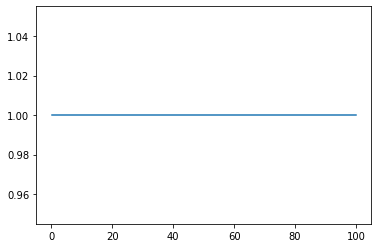

In [25]:
plt.plot(log, logit_search.scores_[1][0])

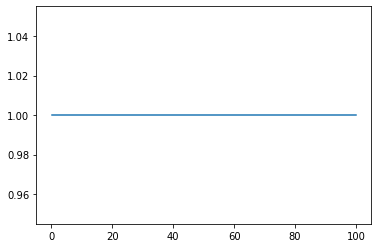

In [26]:
plt.plot(log, logit_search.scores_[1][1])

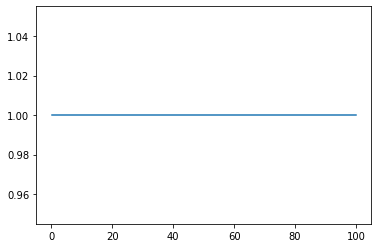

In [27]:
plt.plot(log, logit_search.scores_[1][2])

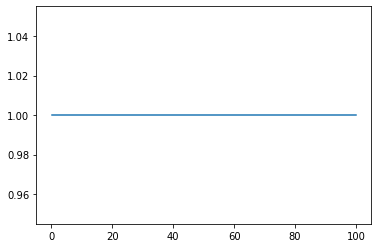

In [28]:
plt.plot(log, logit_search.scores_[1][3])

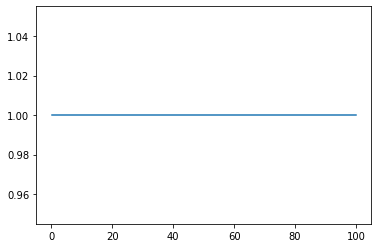

In [29]:
plt.plot(log, logit_search.scores_[1][4])

### 2.5
С помощью метода C_ того же объекта выведите лучшее значение C. Выведите более конкретную область графика (область ~15 точкам по x), включающую лучшее значение C.

*Примечание: используйте plt.xlim.*

In [30]:
best_c = logit_search.C_
best_c

array([0.1])

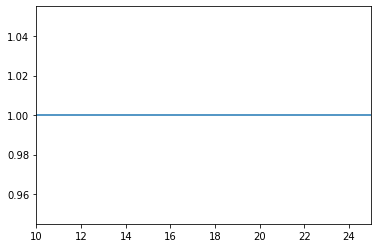

In [31]:
plt.xlim(10, 25)
plt.plot(log, np.mean(logit_search.scores_[1], axis=0))

### 2.6
С помощью метода predict_proba получите вероятности принадлежности объектов тестовой выборки к классам. Постройте график roc_auc для тестовой выборки и выведите значение auc.

**Пример** построения графика.

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve

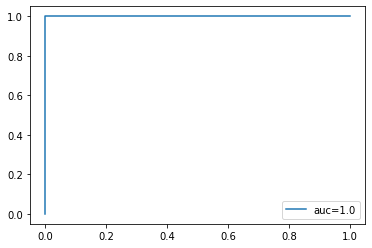

In [33]:
probas = logit_search.fit(x_train, y_train).predict_proba(x_train)
fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
auc = roc_auc_score(y_train, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)

[[0.97755207 0.02244793]
 [0.04274893 0.95725107]
 [0.97755207 0.02244793]
 [0.97755207 0.02244793]
 [0.04274893 0.95725107]
 [0.97755207 0.02244793]
 [0.97755207 0.02244793]
 [0.97755207 0.02244793]
 [0.97755207 0.02244793]
 [0.04274893 0.95725107]
 [0.04274893 0.95725107]
 [0.04274893 0.95725107]
 [0.97755207 0.02244793]
 [0.97755207 0.02244793]
 [0.04274893 0.95725107]
 [0.97755207 0.02244793]
 [0.04274893 0.95725107]
 [0.97755207 0.02244793]
 [0.04274893 0.95725107]
 [0.97755207 0.02244793]
 [0.04274893 0.95725107]
 [0.97755207 0.02244793]
 [0.04274893 0.95725107]
 [0.97755207 0.02244793]
 [0.04274893 0.95725107]
 [0.97755207 0.02244793]
 [0.97755207 0.02244793]
 [0.97755207 0.02244793]
 [0.97755207 0.02244793]
 [0.97755207 0.02244793]
 [0.97755207 0.02244793]
 [0.97755207 0.02244793]
 [0.97755207 0.02244793]
 [0.04274893 0.95725107]
 [0.97755207 0.02244793]
 [0.04274893 0.95725107]
 [0.97755207 0.02244793]
 [0.04274893 0.95725107]
 [0.97755207 0.02244793]
 [0.04274893 0.95725107]


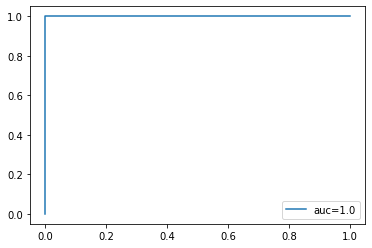

In [34]:
prob = logit_search.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test, prob[:, 1])
auc = roc_auc_score(y_test, prob[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
print(prob)

## Задание №3

### 1.
Вспомните датасет Wine. Загрузите его, разделите на тренировочную и тестовую выборки (random_state=17), используя только [9, 11, 12] признаки.

In [35]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [36]:
import numpy as np
wine_dataset = load_wine()

x = wine_dataset.data[:, 9:13]
y = wine_dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=17)


**Задайте тип кросс-валидации с помощью StratifiedKFold: 5-кратная, random_state=17.**

In [37]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [38]:
skf = StratifiedKFold(n_splits=5, random_state=17)

### 2.
Обучите логистическую регрессию (LogisticRegression) с параметром C по умолчанию и random_state=17. Укажите гиперпараметр multi_class='ovr' - по умолчанию многие классификаторы используют именно его. С помощью cross_val_score сделайте кросс-валидацию (используйте объект skf) и выведите среднюю долю правильных ответов на ней (используйте функцию mean). Отдельно выведите долю правильных ответов на тестовой выборке.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
logit_reg = LogisticRegression(multi_class='ovr', random_state=17)
logit_reg_model = logit_reg.fit(x_train, y_train)
print(np.mean(cross_val_score(logit_reg_model, x_test, y_test, cv=skf)))

0.9111111111111111


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

### 3.
Обучите метод опорных векторов (SVC) с random_state=17 и остальными параметрами по умолчанию. Этот метод при мультиклассовой классификации также использует метод "ovr". Сделайте кросс-валидацию (используйте skf) и, как и в предыдущем пункте, выведите среднюю долю правильных ответов на ней. Отдельно выведите долю правильных ответов на тестовой выборке.

In [43]:
from sklearn.svm import SVC

In [45]:
svc = SVC(random_state=17)
svc_model = svc.fit(x_train, y_train)
print(np.mean(cross_val_score(svc_model, x_test, y_test, cv=skf)))

0.48571428571428565


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Как видно из полученной метрики, на тестовой выборке метод с гиперпараметрами по умолчанию работает явно намного хуже логистической регрессии. В целом, SVM достаточно плохо масштабируется на размер обучающего набора данных (как видно, даже с тремя признаками он работает не очень хорошо), но благодаря возможности выбора различных ядер (функций близости, которые помогают разделять данные) и другим гиперпараметрам SVM можно достаточно точно настроить под определенный вид данных. Подробнее на этом останавливаться в контексте данного урока не будем.

### 4.
Для предсказаний обеих моделей постройте матрицу ошибок (confusion matrix) и напишите, какие классы каждая из моделей путает больше всего между собой.

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
logit_reg_pred = logit_reg_model.predict(x_test)
svc_model_pred = svc_model.predict(x_test)
conf_matr_logit = confusion_matrix(y_test, logit_reg_pred)
conf_matr_svc = confusion_matrix(y_test, svc_model_pred)

print(conf_matr_logit)
print(conf_matr_svc)

[[ 9  0  0]
 [ 0 19  0]
 [ 2  1 14]]
[[ 9  0  0]
 [10  9  0]
 [10  4  3]]


### 5.
Для каждой модели выведите classification report.

In [50]:
classification_report(y_test, logit_reg_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      1.00      0.90         9\n           1       0.95      1.00      0.97        19\n           2       1.00      0.82      0.90        17\n\n    accuracy                           0.93        45\n   macro avg       0.92      0.94      0.93        45\nweighted avg       0.94      0.93      0.93        45\n'

In [51]:
classification_report(y_test, svc_model_pred)

'              precision    recall  f1-score   support\n\n           0       0.31      1.00      0.47         9\n           1       0.69      0.47      0.56        19\n           2       1.00      0.18      0.30        17\n\n    accuracy                           0.47        45\n   macro avg       0.67      0.55      0.45        45\nweighted avg       0.73      0.47      0.45        45\n'